In [53]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import math 
import seaborn as sns 
from tqdm import tqdm 
from sklearn.model_selection import train_test_split
from scipy.stats import norm
from itertools import islice
from scipy.stats import rv_discrete
import requests
from io import BytesIO
from sklearn.metrics import classification_report
from zipfile import ZipFile
from collections import Counter

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00602/DryBeanDataset.zip"

with ZipFile(BytesIO(requests.get(url).content), "r") as myzip:

    with myzip.open("DryBeanDataset/Dry_Bean_Dataset.xlsx", "r") as f:
        df = pd.read_excel(f)
       
      

# EDA & PREPROCESSING

In [46]:
print(df.isnull().sum())

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64


In [ ]:
df['Class'] = df['Class'].replace(['DERMASON','SIRA','SEKER','HOROZ','CALI','BARBUNYA','BOMBAY'],[0,1,2,3,4,5,6])

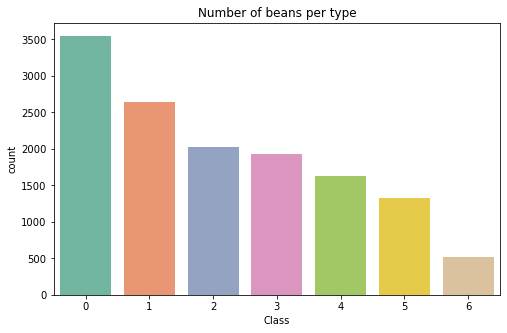

In [23]:
plt.figure(figsize = (8, 5))
sns.countplot(x = df["Class"], palette="Set2")
plt.title("Number of beans per type")
plt.show()

In [45]:
skew = df.skew().to_frame()
skew.columns = ['Skewness']
skew

Skewness
Area             2.952931
Perimeter        1.626124
MajorAxisLength  1.357815
MinorAxisLength  2.238211
AspectRation     0.582573
Eccentricity    -1.062824
ConvexArea       2.941821
EquivDiameter    1.948958
Extent          -0.895348
Solidity        -2.550093
roundness       -0.635749
Compactness      0.037115
ShapeFactor1    -0.534141
ShapeFactor2     0.301226
ShapeFactor3     0.242481
ShapeFactor4    -2.759483
Class            0.458072

In [30]:
def histogram_boxplot(feature, figsize=(10,5), bins = None):
    
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2,
                                           sharex = True, 
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) 
    
    sns.boxplot(x=feature, ax=ax_box2, showmeans=True, color='violet')
    sns.histplot(x=feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.histplot(feature, kde=False, ax=ax_hist2) 
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') 
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') 

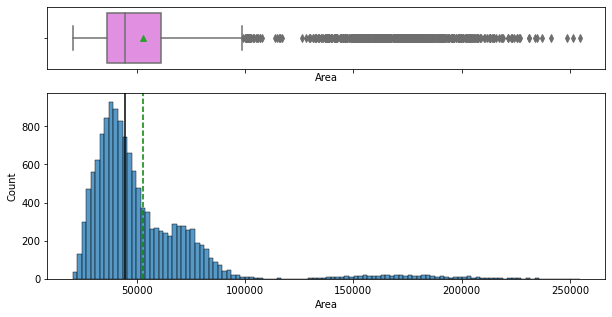

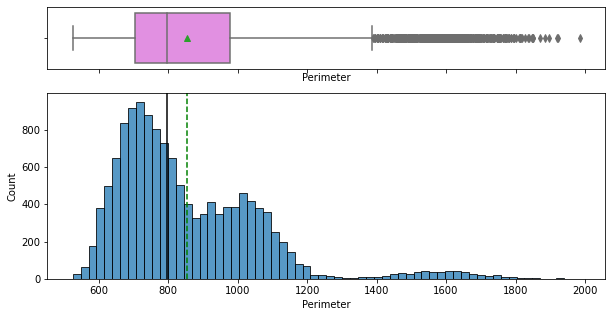

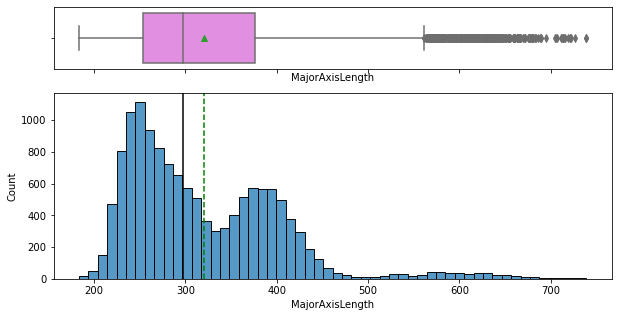

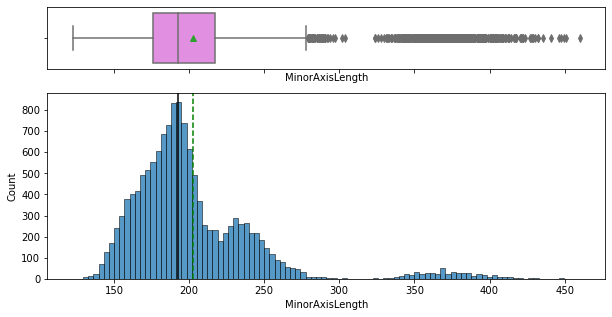

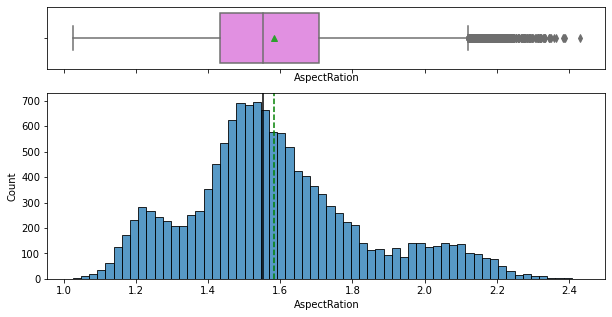

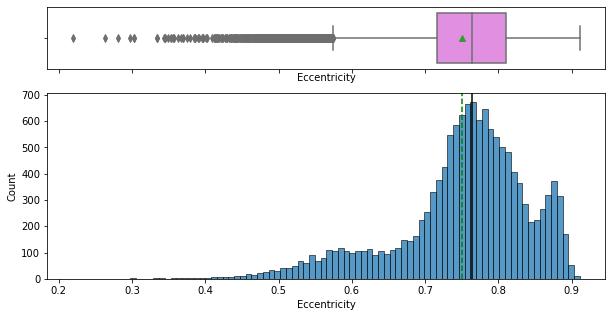

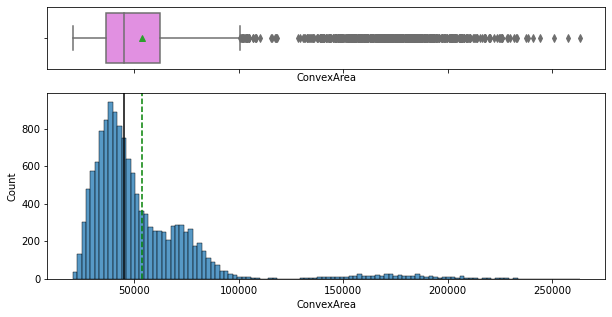

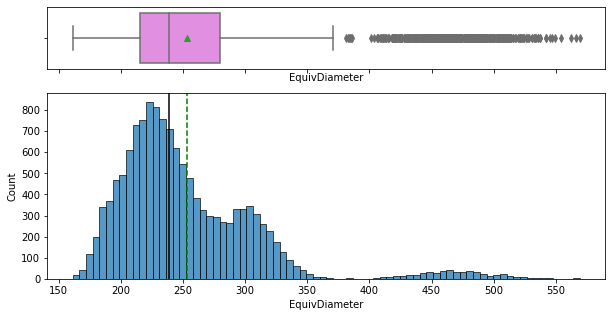

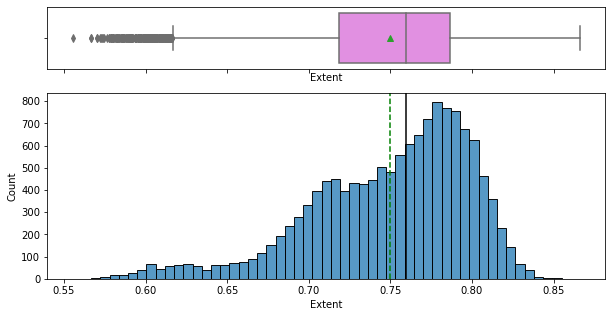

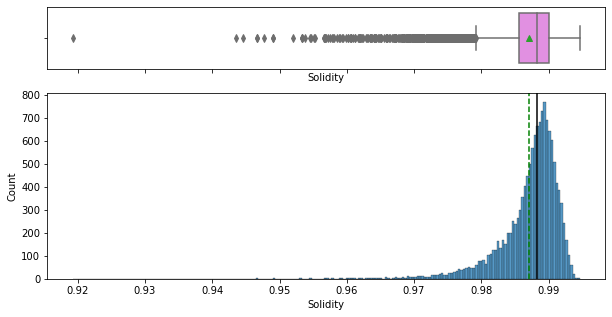

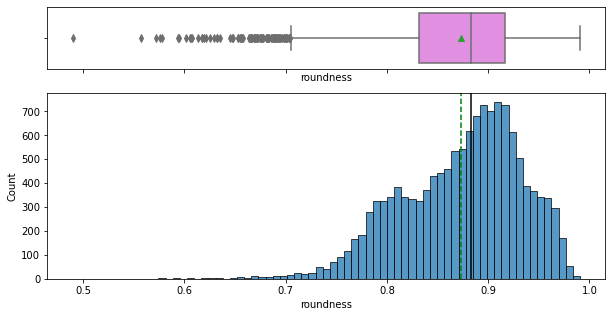

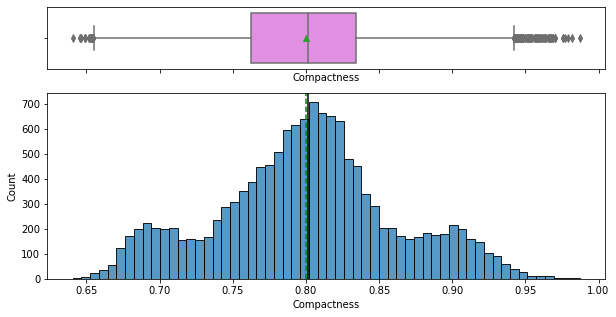

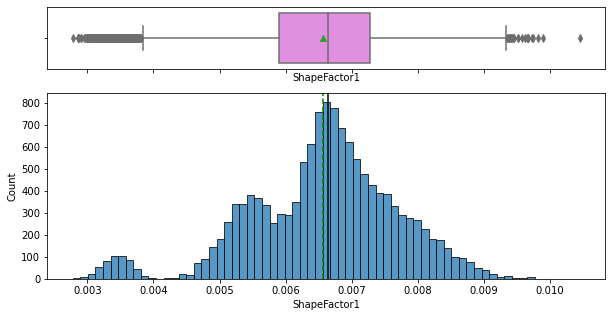

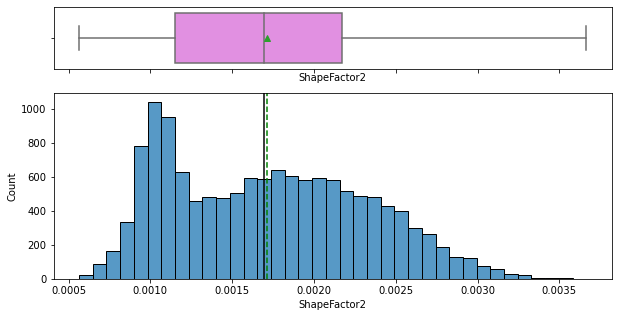

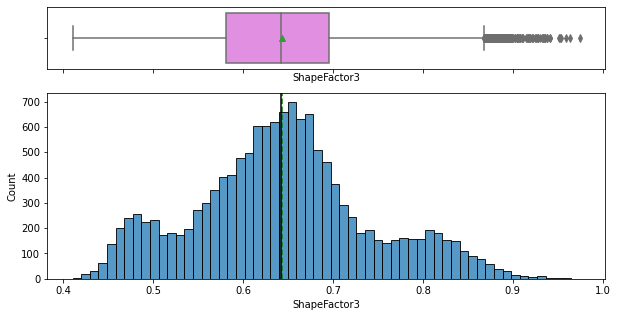

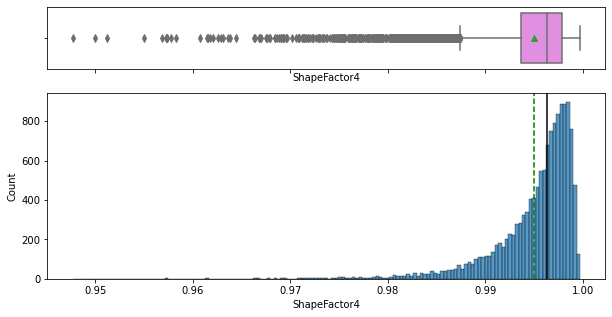

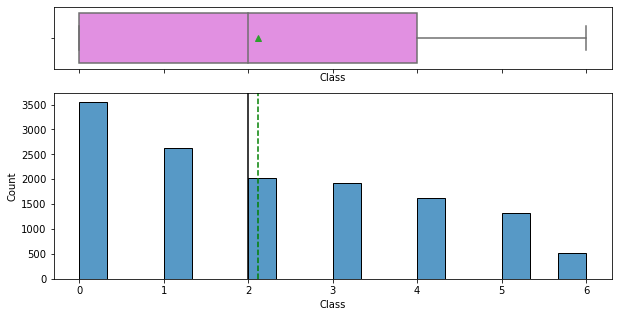

In [31]:
for col in df:
    histogram_boxplot(df[col])

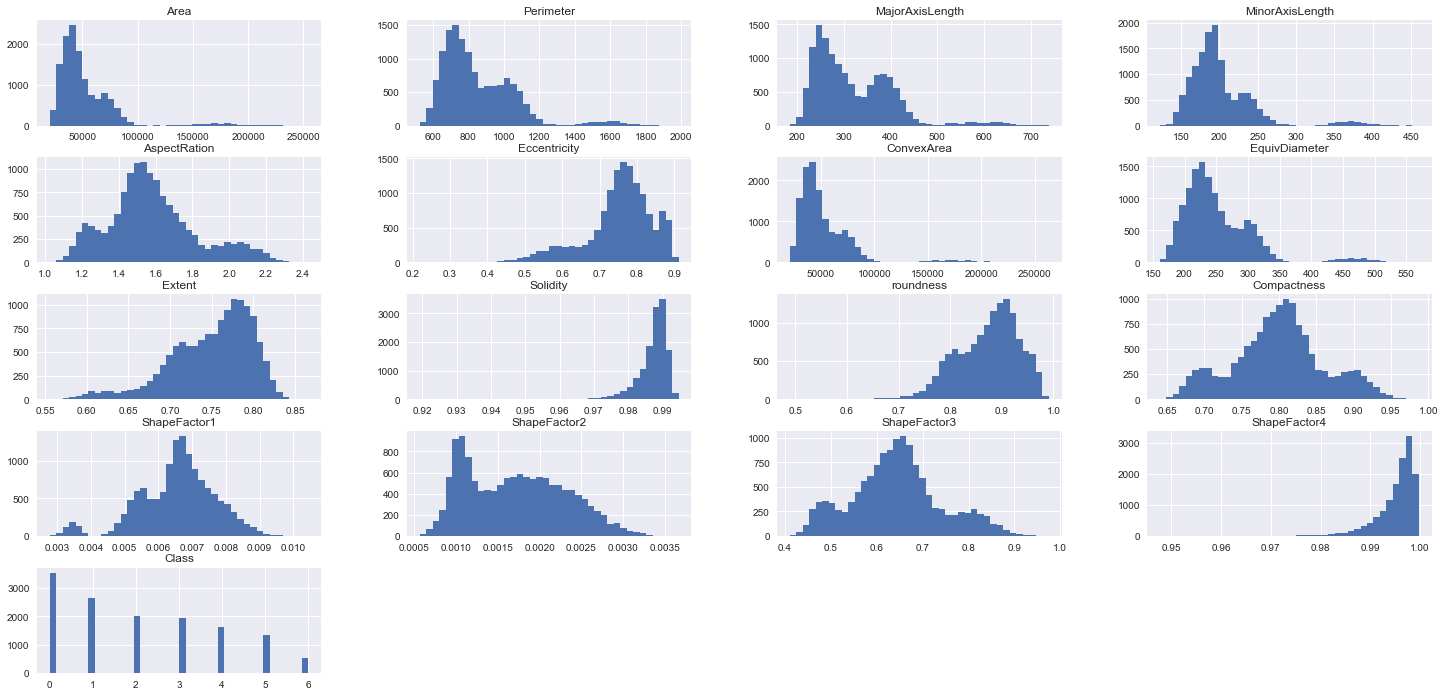

In [42]:
plt.style.use('seaborn')

df.hist(bins=40, figsize=(25, 12));

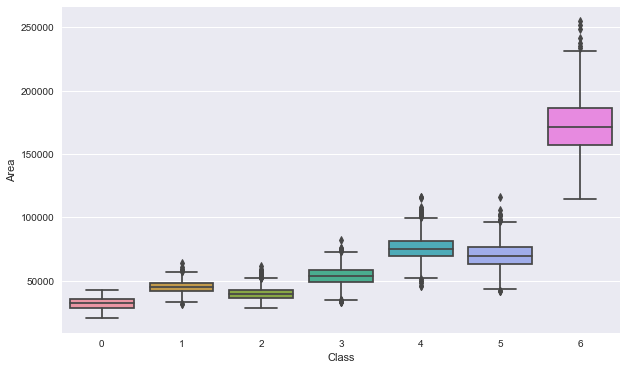

In [43]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Area', data=df); 

<Figure size 1800x1440 with 0 Axes>

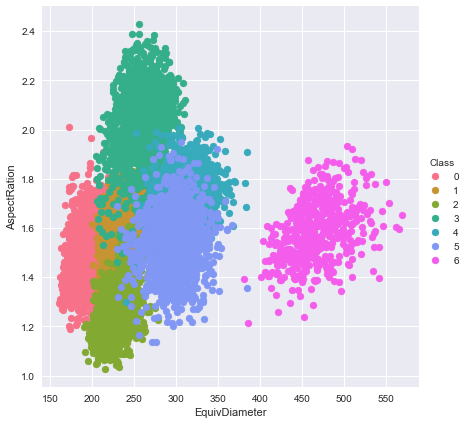

In [44]:
plt.figure(figsize=(25,20))
sns.FacetGrid(df, hue ="Class",height = 6).map(plt.scatter,'EquivDiameter','AspectRation').add_legend()

<AxesSubplot:>

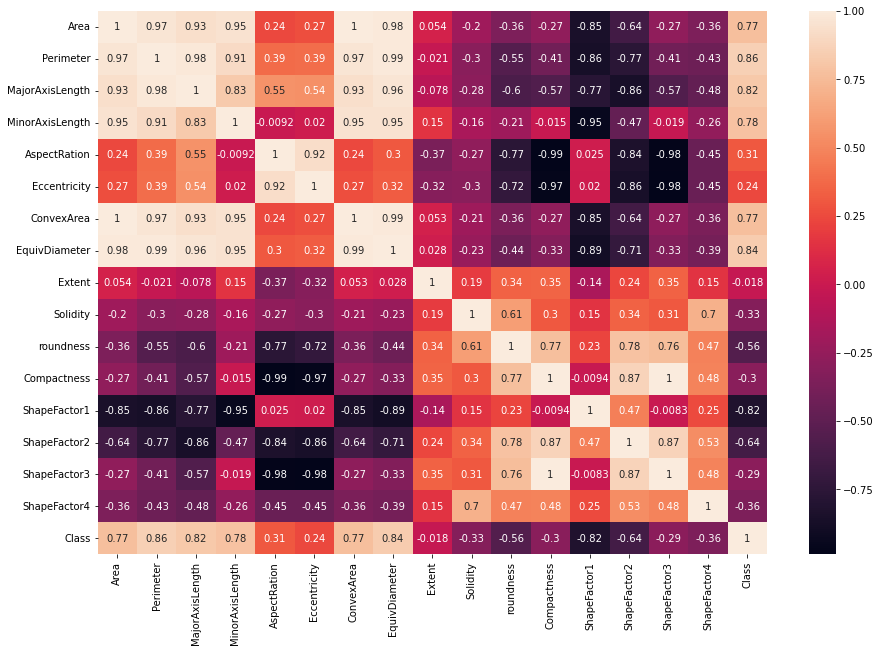

In [25]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

In [26]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(df.iloc[:,0:15])
chi_selector = SelectKBest(chi2, k=10)
chi_selector.fit(X_norm, df.iloc[:,16])
chi_support = chi_selector.get_support()
chi_feature = df.iloc[:,0:15].loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')
chi_feature

10 selected features


['Area',
 'Perimeter',
 'MajorAxisLength',
 'MinorAxisLength',
 'AspectRation',
 'ConvexArea',
 'EquivDiameter',
 'Compactness',
 'ShapeFactor2',
 'ShapeFactor3']

In [29]:
import pandas as pd
from sklearn.preprocessing import normalize
normalize = normalize(df)
data_scaled = pd.DataFrame(normalize)
variance = data_scaled.var()
columns = df.columns
variable = []
for i in range(0,len(variance)):
    if variance[i]>= 0.0000000006:
        variable.append(columns[i])
variable

['Area',
 'Perimeter',
 'MajorAxisLength',
 'MinorAxisLength',
 'ConvexArea',
 'EquivDiameter']

In [37]:
scaler.fit(df.drop('Class',axis=1))
scaled_data = scaler.transform(df.drop('Class',axis=1))

In [38]:
class PCA:
    def __init__(self,n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None
        
    def fit(self,X):
        self.mean = np.mean(X,axis=0)
        X = X-self.mean
        cov = np.cov(X.T)
        eigenvalues,eigenvectors = np.linalg.eig(cov)
        eigenvectors = eigenvectors.T
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        top= eigenvalues[0:self.n_components]
        print(top.sum()/eigenvalues.sum())
        self.components = eigenvectors[0:self.n_components]
    def transform(self,X):
        X = X - self.mean
        print(np.dot(X,self.components.T))
        return np.dot(X,self.components.T)  

In [39]:
pca = PCA(n_components=5)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
x_pca

0.9775734920568955
[[-4.98156099  1.82469731  0.74902104 -0.39081166 -0.03353132]
 [-5.43679225  2.9323648   2.18237398 -0.43195954  1.22646417]
 [-4.7580883   1.82688385  0.5140376  -0.1258538   0.13150554]
 ...
 [-1.41751472  0.1411937  -0.38720635 -0.48643868 -0.38355528]
 [-1.11466584 -0.21267932  0.14408831 -0.84190323 -0.48680458]
 [-0.76643686 -0.64651411 -0.99412157  0.81467905  0.25825818]]


array([[-4.98156099,  1.82469731,  0.74902104, -0.39081166, -0.03353132],
       [-5.43679225,  2.9323648 ,  2.18237398, -0.43195954,  1.22646417],
       [-4.7580883 ,  1.82688385,  0.5140376 , -0.1258538 ,  0.13150554],
       ...,
       [-1.41751472,  0.1411937 , -0.38720635, -0.48643868, -0.38355528],
       [-1.11466584, -0.21267932,  0.14408831, -0.84190323, -0.48680458],
       [-0.76643686, -0.64651411, -0.99412157,  0.81467905,  0.25825818]])

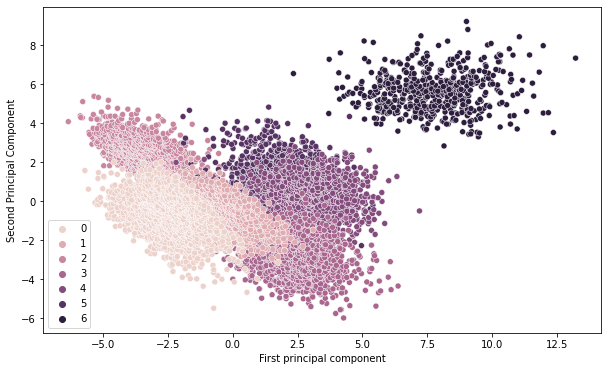

In [41]:
plt.figure(figsize=(10,6))
sns.scatterplot(x= x_pca[:,0],y = x_pca[:,1],hue=df['Class'])
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.legend()

In [48]:
Pca_df = pd.DataFrame(x_pca, columns = ['Pc1','Pc2','Pc3','Pc4','Pc5'])
a = df['Class'].values
Pca_df = pd.concat([Pca_df, pd.DataFrame(a)], axis=1)

In [49]:
Pca_df

Pc1       Pc2       Pc3       Pc4       Pc5  0
0     -4.981561  1.824697  0.749021 -0.390812 -0.033531  2
1     -5.436792  2.932365  2.182374 -0.431960  1.226464  2
2     -4.758088  1.826884  0.514038 -0.125854  0.131506  2
3     -4.300541  2.003661  3.554447  0.082964  0.800766  2
4     -6.349340  4.088205  1.179199 -0.830357 -0.037073  2
...         ...       ...       ...       ...       ... ..
13606 -1.125616 -0.441079 -0.875509 -0.719279 -0.298148  0
13607 -1.605011  0.495997 -0.840558  0.797433  0.017084  0
13608 -1.417515  0.141194 -0.387206 -0.486439 -0.383555  0
13609 -1.114666 -0.212679  0.144088 -0.841903 -0.486805  0
13610 -0.766437 -0.646514 -0.994122  0.814679  0.258258  0

[13611 rows x 6 columns]

In [ ]:
from scipy import stats
df1[(np.abs(stats.zscore(df1)) < 3).all(axis=1)]

In [4]:
df['Class'] = df['Class'].replace(['DERMASON','SIRA','SEKER','HOROZ','CALI','BARBUNYA','BOMBAY'],[0,1,2,3,4,5,6])
df1 = df.copy()
#Drop Periemeter & MajorAxisLength & MinorAxisLength & EquivDiameter & Compactness & ShapeFactor3
#df1.drop(['Perimeter','MajorAxisLength','MinorAxisLength','EquivDiameter','Compactness','ShapeFactor3','Eccentricity'], axis=1, inplace=True)

# MODELLING - NAIVE BAYES CLASSIFIER

In [12]:
class NaiveBayes:
    
    def __init__(self,df):

        self.df = df
        self.df_train, self.df_test = train_test_split(self.df, random_state=0, test_size=0.3)
        
        
    def fit_dist(self,data):
        mu = np.mean(data)
        sigma = np.std(data)
        dist = norm(mu,sigma)
        return dist



    def probability(self,X,prior,distribution):
        self.num_features = self.X_test.shape[1]
        res = []
        for j in range(self.num_features):
            for k,v in distribution.items():
                res.append(v.pdf(X[j]))
        res = res[0::self.num_features+1]
        a = np.prod(res, axis=None, dtype=None, out=None)
        return a*prior

          
          
    def run_model(self):
      
        self.X_train1 = self.df_train.iloc[:,0:-1]
        self.X_test1  = self.df_test.iloc[:,0:-1]
        self.y_train1 = self.df_train.iloc[:,-1]
        self.y_test1  = self.df_test.iloc[:,-1]
    
        self.X_train = self.X_train1.values
        self.X_test = self.X_test1.values
        self.y_train = self.y_train1.values
        self.y_test = self.y_test1.values

        self.num_features = self.X_train.shape[1]
    
        #for i in range(7):
         #self.X_train[str(i)] =  self.X_train[self.y_train == i]
         #self.prior['_y'+ str(i)] =  len(self.x_class[i + str(i)]) / len(self.X_train)
         #print(self.X_train)


        self.X0_train = self.X_train[self.y_train == 0]
        self.X1_train = self.X_train[self.y_train == 1]
        self.X2_train = self.X_train[self.y_train == 2]
        self.X3_train = self.X_train[self.y_train == 3]
        self.X4_train = self.X_train[self.y_train == 4]
        self.X5_train = self.X_train[self.y_train == 5]
        self.X6_train = self.X_train[self.y_train == 6]

      
        self.prior_y0 = len(self.X0_train) / len(self.X_train)
        self.prior_y1 = len(self.X1_train) / len(self.X_train)
        self.prior_y2 = len(self.X2_train) / len(self.X_train)
        self.prior_y3 = len(self.X3_train) / len(self.X_train)
        self.prior_y4 = len(self.X4_train) / len(self.X_train)
        self.prior_y5 = len(self.X5_train) / len(self.X_train)
        self.prior_y6 = len(self.X6_train) / len(self.X_train)

        self.dist1 = {}
        self.dist2 = {}
        self.dist3 = {}
        self.dist4 = {}
        self.dist5 = {}
        self.dist6 = {}
        self.dist7 = {}

        
        for i in range(self.num_features):
            self.dist1['dist_'+'X'+str(i+1)+'y0'] = self.fit_dist(self.X0_train[:,i])
            self.dist2['dist_'+'X'+str(i+1)+'y1'] = self.fit_dist(self.X1_train[:,i])
            self.dist3['dist_'+'X'+str(i+1)+'y2'] = self.fit_dist(self.X2_train[:,i])
            self.dist4['dist_'+'X'+str(i+1)+'y3'] = self.fit_dist(self.X3_train[:,i])
            self.dist5['dist_'+'X'+str(i+1)+'y4'] = self.fit_dist(self.X4_train[:,i])
            self.dist6['dist_'+'X'+str(i+1)+'y5'] = self.fit_dist(self.X5_train[:,i])
            self.dist7['dist_'+'X'+str(i+1)+'y6'] = self.fit_dist(self.X6_train[:,i])
          


        #arr = [0,1,2,3,4,5,6,7,8,9]
        #test = self.X_test[0:1,0:]
        #res = []
        #final = []
        #z = [0,11,22,33,44,55,66,77,88,99]
        #count = -1
        #for j in range(len(arr)):
         # print(j)
          #for k,v in self.dist1.items():
            #print(v.pmf(test[0,j]))
      


    def predict(self):
      
        right = 0
        wrong = 0
        count0 = 0
        count1 = 1
        count2 = 2
        count3 = 3
        count4 = 4
        count5 = 5
        count6 = 6

      
        for sample, target in zip(self.X_test, self.y_test):

            py0 = self.probability(sample,self.prior_y0,self.dist1)
            py1 = self.probability(sample,self.prior_y1,self.dist2)
            py2 = self.probability(sample,self.prior_y2,self.dist3)
            py3 = self.probability(sample,self.prior_y3,self.dist4)
            py4 = self.probability(sample,self.prior_y4,self.dist5)
            py5 = self.probability(sample,self.prior_y5,self.dist6)
            py6 = self.probability(sample,self.prior_y6,self.dist7)
            
            print('p(y=0 | %s) = %.3f' % (sample, py0*100))
            print('p(y=1 | %s) = %.3f' % (sample, py1*100))
            print('p(y=2 | %s) = %.3f' % (sample, py2*100))
            print('p(y=3 | %s) = %.3f' % (sample, py3*100))
            print('p(y=4 | %s) = %.3f' % (sample, py4*100))
            print('p(y=5 | %s) = %.3f' % (sample, py5*100))
            print('p(y=6 | %s) = %.3f' % (sample, py6*100))
            
            print('model predicted class {} and the truth was {} \n' .format(np.argmax([py0*100,py1*100,py2*100,py3*100,py4*100,py5*100,py6*100]), target))
            if (np.argmax([py0*100,py1*100,py2*100,py3*100,py4*100,py5*100,py6*100]) == target):
                print('Right\n')
                right+=1
            else:
                if target == 0:
                    count0+=1
                elif target ==1:
                    count1+=1
                elif target ==2:
                    count2+=1
                elif target ==3:
                    count3+=1
                elif target ==4:
                    count4+=1
                elif target ==5:
                    count5+=1
                elif target ==6:
                    count6+=1
                print('class being misclassified is',target)
                print('Wrong\n')
                wrong+=1

        print((right)/(right+wrong))
        print('count for class 0 :', count0)
        print('count for class 1 :', count1)
        print('count for class 2 :', count2)
        print('count for class 3 :', count3)
        print('count for class 4 :', count4)
        print('count for class 5 :', count5)
        print('count for class 6 :', count6)
        
        

In [13]:
nb = NaiveBayes(df1)
nb.run_model()
nb.predict()

p(y=0 | [3.72770000e+04 1.47262201e+00 3.76840000e+04 8.02691645e-01
 9.89199660e-01 9.28748324e-01 7.10330338e-03 2.00787652e-03
 9.96872750e-01]) = 136325.884
p(y=1 | [3.72770000e+04 1.47262201e+00 3.76840000e+04 8.02691645e-01
 9.89199660e-01 9.28748324e-01 7.10330338e-03 2.00787652e-03
 9.96872750e-01]) = 1945.881
p(y=2 | [3.72770000e+04 1.47262201e+00 3.76840000e+04 8.02691645e-01
 9.89199660e-01 9.28748324e-01 7.10330338e-03 2.00787652e-03
 9.96872750e-01]) = 245.027
p(y=3 | [3.72770000e+04 1.47262201e+00 3.76840000e+04 8.02691645e-01
 9.89199660e-01 9.28748324e-01 7.10330338e-03 2.00787652e-03
 9.96872750e-01]) = 0.000
p(y=4 | [3.72770000e+04 1.47262201e+00 3.76840000e+04 8.02691645e-01
 9.89199660e-01 9.28748324e-01 7.10330338e-03 2.00787652e-03
 9.96872750e-01]) = 0.000
p(y=5 | [3.72770000e+04 1.47262201e+00 3.76840000e+04 8.02691645e-01
 9.89199660e-01 9.28748324e-01 7.10330338e-03 2.00787652e-03
 9.96872750e-01]) = 0.000
p(y=6 | [3.72770000e+04 1.47262201e+00 3.76840000e+04 

# MODELLING - K NEAREST NEIGHBORS

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df1.drop('Class',axis=1))
scaled_data = scaler.transform(df1.drop('Class',axis=1))

In [21]:
class KNearestNeighbor:
    
    def __init__(self,X,y):
        
        self.X = X
        self.y = y
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X,self.y, random_state=0, test_size=0.3)

    def euclidean_dist(self,pointA, pointB):
        distance = np.square(pointA - pointB) # (ai-bi)**2 for every point in the vectors
        distance = np.sum(distance) # adds all values
        distance = np.sqrt(distance) 
        return distance

    def distance_from_all_training(self,test_point):
        dist_array = np.array([])
        for train_point in self.X_train:
            dist = self.euclidean_dist(test_point, train_point)
            dist_array = np.append(dist_array, dist)
      
        return dist_array


    def distance_from_all_training2(self,k=5):
        dist_array = np.array([])
        for train_point in self.X_train:
            for test_point in self.X_test:
                dist = self.euclidean_dist(test_point, train_point)
            dist_array = np.append(dist_array, dist)
            
        print(dist_array.shape)
        print(dist_array.shape)
        return dist_array

    def accuracy(self,y_preds):
        
        count0 = 0
        count1 = 0
        count2 = 0
        count3 = 0
        count4 = 0
        count5 = 0
        count6 = 0
        total_correct = 0
        
        for i in range(len(self.y_test)):
                if int(self.y_test[i]) == int(y_preds[i]):
                    print('Correct Classification')
                    print(y_preds[i])
                    total_correct += 1
                else:
                    print('Wrong Classification : Class',self.y_test[i])
                    if self.y_test[i] ==0:
                        count0+=1
                    elif self.y_test[i] ==1:
                        count1+=1
                    elif self.y_test[i] ==2:
                        count2+=1
                    elif self.y_test[i] ==3:
                        count3+=1
                    elif self.y_test[i] ==4:
                        count4+=1
                    elif self.y_test[i] ==5:
                        count5+=1
                    else:
                        count6+=1
                    
                        
                    
        print(total_correct)
        print('total incorrect classifications for class 1 are:',count0)
        print('total incorrect classifications for class 2 are:',count1)
        print('total incorrect classifications for class 3 are:',count2)
        print('total incorrect classifications for class 4 are:',count3)
        print('total incorrect classifications for class 5 are:',count4)
        print('total incorrect classifications for class 6 are:',count5)
        print('total incorrect classifications for class 7 are:',count6)
        print(classification_report(self.y_test, y_preds))
        return classification_report(self.y_test, y_preds)

    def KNNClassifier(self,k = 5):
        predictions = np.array([])
        train_features = self.X_train
        train_target = self.y_train

        test_features = self.X_test
        train_target = train_target.reshape(-1,1)
        for test_point in self.X_test:
            dist_array = self.distance_from_all_training(test_point).reshape(-1,1)
            
            neighbors = np.concatenate((dist_array, train_target),axis = 1,) 
            neighbors_sorted = neighbors[neighbors[:, 0].argsort()] # sorts training points on the basis of distance
            k_neighbors = neighbors_sorted[:k] # selects k-nearest neighbors
            frequency = np.unique(k_neighbors[:, 1], return_counts=True)
            target_class = frequency[0][frequency[1].argmax()] # selects label with highest frequency    
            predictions = np.append(predictions, target_class)

        return predictions
    

In [22]:
knn = KNearestNeighbor(X = scaled_data, y = df1.values[:,-1])
knn.accuracy(y_preds = knn.KNNClassifier())

Correct Classification
0.0
Correct Classification
0.0
Correct Classification
0.0
Correct Classification
1.0
Wrong Classification : Class 2.0
Wrong Classification : Class 4.0
Correct Classification
2.0
Correct Classification
0.0
Correct Classification
0.0
Correct Classification
1.0
Correct Classification
1.0
Correct Classification
2.0
Correct Classification
1.0
Correct Classification
2.0
Correct Classification
6.0
Correct Classification
4.0
Correct Classification
4.0
Correct Classification
1.0
Correct Classification
2.0
Correct Classification
6.0
Correct Classification
0.0
Correct Classification
1.0
Correct Classification
2.0
Correct Classification
4.0
Correct Classification
0.0
Correct Classification
3.0
Wrong Classification : Class 4.0
Correct Classification
4.0
Correct Classification
3.0
Correct Classification
0.0
Correct Classification
6.0
Correct Classification
2.0
Correct Classification
3.0
Correct Classification
5.0
Correct Classification
1.0
Correct Classification
1.0
Correct Cl

'              precision    recall  f1-score   support\n\n         0.0       0.91      0.94      0.92      1057\n         1.0       0.89      0.87      0.88       830\n         2.0       0.95      0.94      0.95       579\n         3.0       0.96      0.97      0.97       594\n         4.0       0.93      0.96      0.94       501\n         5.0       0.96      0.88      0.92       389\n         6.0       1.00      1.00      1.00       134\n\n    accuracy                           0.93      4084\n   macro avg       0.94      0.94      0.94      4084\nweighted avg       0.93      0.93      0.93      4084\n'

# Decision Tree Model

In [63]:
df

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0      28395    610.291       208.178117       173.888747      1.197191   
1      28734    638.018       200.524796       182.734419      1.097356   
2      29380    624.110       212.826130       175.931143      1.209713   
3      30008    645.884       210.557999       182.516516      1.153638   
4      30140    620.134       201.847882       190.279279      1.060798   
...      ...        ...              ...              ...           ...   
13606  42097    759.696       288.721612       185.944705      1.552728   
13607  42101    757.499       281.576392       190.713136      1.476439   
13608  42139    759.321       281.539928       191.187979      1.472582   
13609  42147    763.779       283.382636       190.275731      1.489326   
13610  42159    772.237       295.142741       182.204716      1.619841   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0          0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1          0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2          0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3          0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4          0.333680       30417     195.896503  0.773098  0.990893   0.984877   
...             ...         ...            ...       ...       ...        ...   
13606      0.765002       42508     231.515799  0.714574  0.990331   0.916603   
13607      0.735702       42494     231.526798  0.799943  0.990752   0.922015   
13608      0.734065       42569     231.631261  0.729932  0.989899   0.918424   
13609      0.741055       42667     231.653248  0.705389  0.987813   0.907906   
13610      0.786693       42600     231.686223  0.788962  0.989648   0.888380   

       Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  \
0         0.913358      0.007332      0.003147      0.834222      0.998724   
1         0.953861      0.006979      0.003564      0.909851      0.998430   
2         0.908774      0.007244      0.003048      0.825871      0.999066   
3         0.928329      0.007017      0.003215      0.861794      0.994199   
4         0.970516      0.006697      0.003665      0.941900      0.999166   
...            ...           ...           ...           ...           ...   
13606     0.801865      0.006858      0.001749      0.642988      0.998385   
13607     0.822252      0.006688      0.001886      0.676099      0.998219   
13608     0.822730      0.006681      0.001888      0.676884      0.996767   
13609     0.817457      0.006724      0.001852      0.668237      0.995222   
13610     0.784997      0.007001      0.001640      0.616221      0.998180   

       Class  
0          2  
1          2  
2          2  
3          2  
4          2  
...      ...  
13606      0  
13607      0  
13608      0  
13609      0  
13610      0  

[13611 rows x 17 columns]

In [64]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, random_state=0, test_size=0.3)

In [60]:
class Node: 
    
    def __init__( self, Y, X, min_samples_split=None,max_depth=None, depth=None, node_type=None, rule=None):
    
        self.Y = Y 
        self.X = X
        self.min_samples_split = min_samples_split if min_samples_split else 20
        self.max_depth = max_depth if max_depth else 10
        self.depth = depth if depth else 0
        self.features = list(self.X.columns) 
        self.node_type = node_type if node_type else 'root'
        self.rule = rule if rule else "" 
        self.counts = Counter(Y)
        self.gini_impurity = self.get_GINI()
        counts_sorted = list(sorted(self.counts.items(), key=lambda item: item[1]))
        yhat = None
        if len(counts_sorted) > 0:
            yhat = counts_sorted[-1][0]
        self.yhat = yhat 
        self.n = len(Y)
        self.left = None 
        self.right = None 
        self.best_feature = None 
        self.best_value = None 

    @staticmethod
    def GINI_impurity(y1_count: int, y2_count: int,y3_count: int, y4_count: int,y5_count: int, y6_count: int,y0_count: int) -> float:
    
        
        if y0_count is None:
            y0_count = 0

        if y1_count is None:
            y1_count = 0

        if y2_count is None:
            y2_count = 0

        if y3_count is None:
            y3_count = 0
                
        if y4_count is None:
            y4_count = 0

        if y5_count is None:
            y5_count = 0
                
        if y6_count is None:
            y6_count = 0
    
        n = y1_count + y2_count+ y3_count + y4_count+ y5_count + y6_count+y0_count

        if n == 0:
            return 0.0


        p1 = y1_count / n
        p2 = y2_count / n
        p3 = y3_count / n
        p4 = y4_count / n
        p5 = y5_count / n
        p6 = y6_count / n
        p0 = y0_count / n
  
        gini = 1 - (p1 ** 2 + p2 ** 2+p3 ** 2 + p4 ** 2+p5 ** 2 + p6 ** 2+ p0 ** 2)
        return gini

    @staticmethod
    def moving_average(x: np.array, window: int) -> np.array:   
        return np.convolve(x, np.ones(window), 'valid') / window
      

    def get_GINI(self):
        
      
        y0_count, y1_count ,y2_count, y3_count,y4_count, y5_count,y6_count = self.counts.get(0, 0), self.counts.get(1, 0), self.counts.get(2, 0), self.counts.get(3, 0), self.counts.get(4, 0),self.counts.get(5, 0), self.counts.get(6, 0)
        return self.GINI_impurity( y0_count, y1_count ,y2_count, y3_count,y4_count, y5_count,y6_count)

    def best_split(self) -> tuple:
       
        
        df = self.X.copy()
        df['Y'] = self.Y

        GINI_base = self.get_GINI()
        max_gain = 0
        best_feature = None
        best_value = None

        for feature in self.features:
            df1 = df.dropna().sort_values(feature)
            x_moving_average = self.moving_average(df1[feature].unique(), 2)
            for value in x_moving_average:
                left_counts = Counter(df1[df1[feature]<value]['Y'])
                right_counts = Counter(df1[df1[feature]>=value]['Y'])
  

                y0_left, y1_left, y0_right, y1_right = left_counts.get(0, 0), left_counts.get(1, 0), right_counts.get(0, 0), right_counts.get(1, 0)
                y2_left, y3_left, y2_right, y3_right = left_counts.get(2, 0), left_counts.get(3, 0), right_counts.get(2, 0), right_counts.get(3, 0)
                y4_left, y5_left, y4_right, y5_right = left_counts.get(4, 0), left_counts.get(5, 0), right_counts.get(4, 0), right_counts.get(5, 0)
                y6_left, y6_right = left_counts.get(6, 0), right_counts.get(6, 0)


                gini_left = self.GINI_impurity(y0_left, y1_left,y2_left, y3_left,y4_left, y5_left,y6_left)
                gini_right = self.GINI_impurity(y0_right, y1_right,y2_right, y3_right,y4_right, y5_right,y6_right)

                n_left = y0_left + y1_left+ y2_left + y3_left+ y4_left + y5_left+ y6_left
                n_right = y0_right + y1_right+y2_right + y3_right+y4_right + y5_right+y6_right

                w_left = n_left / (n_left + n_right)
                w_right = n_right / (n_left + n_right)
                wGINI = w_left * gini_left + w_right * gini_right
                GINIgain = GINI_base - wGINI

                # Checking if this is the best split so far 
                if GINIgain > max_gain:
                    best_feature = feature
                    best_value = value 
                    max_gain = GINIgain

        return (best_feature, best_value)

    def grow_tree(self):
    
        df = self.X.copy()
        df['Y'] = self.Y
        if (self.depth < self.max_depth) and (self.n >= self.min_samples_split):
            best_feature, best_value = self.best_split()

            if best_feature is not None:
                self.best_feature = best_feature
                self.best_value = best_value
                left_df, right_df = df[df[best_feature]<=best_value].copy(), df[df[best_feature]>best_value].copy()
                left = Node(
                    left_df['Y'].values.tolist(), 
                    left_df[self.features], 
                    depth=self.depth + 1, 
                    max_depth=self.max_depth, 
                    min_samples_split=self.min_samples_split, 
                    node_type='left_node',
                    rule=f"{best_feature} <= {round(best_value, 3)}"
                    )

                self.left = left 
                self.left.grow_tree()

                right = Node(
                    right_df['Y'].values.tolist(), 
                    right_df[self.features], 
                    depth=self.depth + 1, 
                    max_depth=self.max_depth, 
                    min_samples_split=self.min_samples_split,
                    node_type='right_node',
                    rule=f"{best_feature} > {round(best_value, 3)}"
                    )

                self.right = right
                self.right.grow_tree()

    def print_info(self, width=4):
       
        const = int(self.depth * width ** 1.5)
        spaces = "-" * const
        
        if self.node_type == 'root':
            print("Root")
        else:
            print(f"|{spaces} Split rule: {self.rule}")
        print(f"{' ' * const}   | GINI impurity of the node: {round(self.gini_impurity, 2)}")
        print(f"{' ' * const}   | Class distribution in the node: {dict(self.counts)}")
        print(f"{' ' * const}   | Predicted class: {self.yhat}")   

    def print_tree(self):

        self.print_info() 
        if self.left is not None: 
            self.left.print_tree()
        if self.right is not None:
            self.right.print_tree()
    
    def predict(self, X:pd.DataFrame):
    
        predictions = []

        for _, x in X.iterrows():
            values = {}
            for feature in self.features:
                values.update({feature: x[feature]})
        
            predictions.append(self.predict_obs(values))
        incorrect = 0
        correct =  0
        count0 = 0
        count1 = 0
        count2 = 0
        count3 = 0
        count4 = 0
        count5 = 0
        count6 = 0
        Y = df_test.iloc[0:,-1]
        for x,y in zip(Y.values,predictions):
            if y != x:
                incorrect+=1
                print('incorrect classification for class:',x)
                if x==0:
                    count0+=1
                elif x==1:
                    count1+=1
                elif x==2:
                    count2+=1
                elif x==3:
                    count3+=1
                elif x==4:
                    count4+=1
                elif x==5:
                    count5+=1
                else:
                    count6+=1
            else:
                correct+=1
        acc = (correct)/(incorrect+correct)
        print('total incorrect classifications for class 1 are:',count0)
        print('total incorrect classifications for class 2 are:',count1)
        print('total incorrect classifications for class 3 are:',count2)
        print('total incorrect classifications for class 4 are:',count3)
        print('total incorrect classifications for class 5 are:',count4)
        print('total incorrect classifications for class 6 are:',count5)
        print('total incorrect classifications for class 7 are:',count6)

        return predictions,acc


    def predict_obs(self, values: dict) -> int:
    
        cur_node = self
        while cur_node.depth < cur_node.max_depth:
            # Traversing the nodes all the way to the bottom
            best_feature = cur_node.best_feature
            best_value = cur_node.best_value
  

            if cur_node.n < cur_node.min_samples_split:
                break 

            if (values.get(best_feature) < best_value):
                if self.left is not None:
                    cur_node = cur_node.left
            else:
                if self.right is not None:
                    cur_node = cur_node.right
            
        return cur_node.yhat
   

In [65]:
tree = Node(Y= df_train.values[0:,-1], X = df_train.iloc[:,0:-1], max_depth=5)
tree.best_split()
tree.grow_tree()
tree.print_tree()

Root
   | GINI impurity of the node: 0.83
   | Class distribution in the node: {0.0: 2489, 5.0: 933, 4.0: 1129, 3.0: 1334, 1.0: 1806, 2.0: 1448, 6.0: 388}
   | Predicted class: 0.0
|-------- Split rule: MajorAxisLength <= 280.704
           | GINI impurity of the node: 0.54
           | Class distribution in the node: {0.0: 2363, 1.0: 327, 2.0: 1338, 5.0: 3, 3.0: 11}
           | Predicted class: 0.0
|---------------- Split rule: ShapeFactor1 <= 0.007
                   | GINI impurity of the node: 0.23
                   | Class distribution in the node: {2.0: 1265, 0.0: 84, 1.0: 100, 5.0: 3, 3.0: 1}
                   | Predicted class: 2.0
|------------------------ Split rule: Compactness <= 0.853
                           | GINI impurity of the node: 0.6
                           | Class distribution in the node: {0.0: 54, 1.0: 87, 2.0: 26, 3.0: 1}
                           | Predicted class: 1.0
|-------------------------------- Split rule: Perimeter <= 746.884
                

In [66]:
tree.predict(df_test.iloc[:,0:-1])

incorrect classification for class: 2
incorrect classification for class: 4
incorrect classification for class: 4
incorrect classification for class: 0
incorrect classification for class: 1
incorrect classification for class: 1
incorrect classification for class: 3
incorrect classification for class: 4
incorrect classification for class: 5
incorrect classification for class: 0
incorrect classification for class: 4
incorrect classification for class: 4
incorrect classification for class: 4
incorrect classification for class: 0
incorrect classification for class: 5
incorrect classification for class: 4
incorrect classification for class: 2
incorrect classification for class: 4
incorrect classification for class: 4
incorrect classification for class: 3
incorrect classification for class: 4
incorrect classification for class: 3
incorrect classification for class: 3
incorrect classification for class: 1
incorrect classification for class: 5
incorrect classification for class: 2
incorrect cl

([0.0,
  0.0,
  0.0,
  1.0,
  1.0,
  4.0,
  2.0,
  0.0,
  0.0,
  1.0,
  1.0,
  2.0,
  1.0,
  2.0,
  6.0,
  4.0,
  4.0,
  1.0,
  2.0,
  6.0,
  0.0,
  1.0,
  2.0,
  4.0,
  0.0,
  3.0,
  2.0,
  5.0,
  3.0,
  0.0,
  6.0,
  2.0,
  3.0,
  5.0,
  1.0,
  1.0,
  0.0,
  1.0,
  1.0,
  0.0,
  2.0,
  0.0,
  4.0,
  2.0,
  4.0,
  0.0,
  0.0,
  2.0,
  2.0,
  0.0,
  0.0,
  0.0,
  2.0,
  4.0,
  0.0,
  3.0,
  1.0,
  6.0,
  1.0,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  3.0,
  1.0,
  0.0,
  0.0,
  4.0,
  0.0,
  2.0,
  3.0,
  3.0,
  0.0,
  0.0,
  1.0,
  2.0,
  5.0,
  3.0,
  5.0,
  1.0,
  0.0,
  4.0,
  1.0,
  2.0,
  5.0,
  0.0,
  0.0,
  5.0,
  1.0,
  5.0,
  4.0,
  4.0,
  0.0,
  5.0,
  1.0,
  0.0,
  0.0,
  1.0,
  3.0,
  2.0,
  4.0,
  0.0,
  1.0,
  1.0,
  3.0,
  5.0,
  1.0,
  2.0,
  1.0,
  2.0,
  3.0,
  1.0,
  0.0,
  1.0,
  1.0,
  0.0,
  5.0,
  5.0,
  1.0,
  0.0,
  4.0,
  5.0,
  1.0,
  0.0,
  1.0,
  2.0,
  0.0,
  4.0,
  2.0,
  5.0,
  4.0,
  2.0,
  3.0,
  1.0,
  4.0,
  1.0,
  2.0,
  4.0,
  4.0,
  0.0,
  5.0,
  3.0,